# MODEL SUBMISSION

## IMPORT LIBRARIES

I found extremely useful this :

http://docs.statwing.com/interpreting-residual-plots-to-improve-your-regression/#hetero-header

Approach:

Dummy of categorical variables and scaling everything:

hr, humity, weekday, season and weather 

random forest 

mae train 0.19
mae test 0.39 





In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import scipy.stats as ss
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm

## DATA IMPORT

In [2]:
df_library = pd.read_csv('library_train.csv')
df_library.head()

,Unnamed: 0,dteday,hr,holiday,weekday,workingday,season_t,weather,temperature,s_temp,humidity,winds,n_employee,exp_employee,occupancy
0,0,2011-05-19,1,0,4,1,summer,Clear,20.50,24.240,94,0.0,2.67,9.29,6
1,1,2012-08-19,18,0,0,0,fall,Cloudy,26.24,29.545,78,7.0,2.67,3.57,377
2,2,2011-09-24,8,0,6,0,winter,Cloudy,23.78,27.275,90,6.0,2.67,28.00,121
3,3,2012-11-05,4,0,1,1,winter,Cloudy,12.30,14.395,52,17.0,2.67,4.57,16
4,4,2011-11-12,0,0,6,0,winter,Clear,9.84,12.120,60,9.0,1.67,7.57,64


In [3]:
df_library.shape

(10427, 15)

## EXPLORATORY DATA ANALYSIS

In [4]:
#some information of the features
df_library.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10427 entries, 0 to 10426
Data columns (total 15 columns):
Unnamed: 0      10427 non-null int64
dteday          10427 non-null object
hr              10427 non-null int64
holiday         10427 non-null int64
weekday         10427 non-null int64
workingday      10427 non-null int64
season_t        10427 non-null object
weather         10427 non-null object
temperature     10427 non-null float64
s_temp          10427 non-null float64
humidity        10427 non-null int64
winds           10427 non-null float64
n_employee      10427 non-null float64
exp_employee    10427 non-null float64
occupancy       10427 non-null int64
dtypes: float64(5), int64(7), object(3)
memory usage: 1.2+ MB


### Drop Column Unnamed: 0

In [5]:
df_library = df_library.drop(columns=('Unnamed: 0'))
df_library.head()

,dteday,hr,holiday,weekday,workingday,season_t,weather,temperature,s_temp,humidity,winds,n_employee,exp_employee,occupancy
0,2011-05-19,1,0,4,1,summer,Clear,20.50,24.240,94,0.0,2.67,9.29,6
1,2012-08-19,18,0,0,0,fall,Cloudy,26.24,29.545,78,7.0,2.67,3.57,377
2,2011-09-24,8,0,6,0,winter,Cloudy,23.78,27.275,90,6.0,2.67,28.00,121
3,2012-11-05,4,0,1,1,winter,Cloudy,12.30,14.395,52,17.0,2.67,4.57,16
4,2011-11-12,0,0,6,0,winter,Clear,9.84,12.120,60,9.0,1.67,7.57,64


In [6]:
# visualize the relationship between the features and the response using scatterplots
%matplotlib inline
#sns.pairplot(df_library, x_vars=df_library.columns, y_vars='occupancy')

In [7]:
df_library.shape

(10427, 14)

## Handle dates

In [8]:
df_dates = df_library[['dteday']].copy()
df_dates.columns = ['date']
df_dates.head()

,date
0,2011-05-19
1,2012-08-19
2,2011-09-24
3,2012-11-05
4,2011-11-12


In [9]:
# Creating new columns and deleting the time frame
df_dates['year'] = pd.DatetimeIndex(df_dates['date']).year
df_dates['month'] = pd.DatetimeIndex(df_dates['date']).month
df_dates.head()

,date,year,month
0,2011-05-19,2011,5
1,2012-08-19,2012,8
2,2011-09-24,2011,9
3,2012-11-05,2012,11
4,2011-11-12,2011,11


In [10]:
df_dates.shape

(10427, 3)

### Merging the datasets

## Merge funzionante

In [11]:
data = pd.merge(df_dates,df_library,left_index=True,right_index=True ) 
data = data.drop(columns=['date', 'dteday'])
data.head()

,year,month,hr,holiday,weekday,workingday,season_t,weather,temperature,s_temp,humidity,winds,n_employee,exp_employee,occupancy
0,2011,5,1,0,4,1,summer,Clear,20.50,24.240,94,0.0,2.67,9.29,6
1,2012,8,18,0,0,0,fall,Cloudy,26.24,29.545,78,7.0,2.67,3.57,377
2,2011,9,8,0,6,0,winter,Cloudy,23.78,27.275,90,6.0,2.67,28.00,121
3,2012,11,4,0,1,1,winter,Cloudy,12.30,14.395,52,17.0,2.67,4.57,16
4,2011,11,0,0,6,0,winter,Clear,9.84,12.120,60,9.0,1.67,7.57,64


In [12]:
data.shape

(10427, 15)

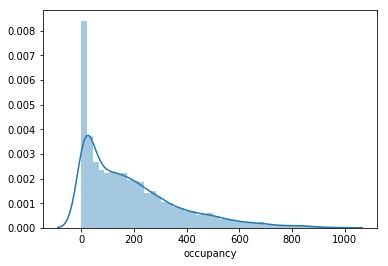

In [13]:
sns.distplot(data['occupancy'])

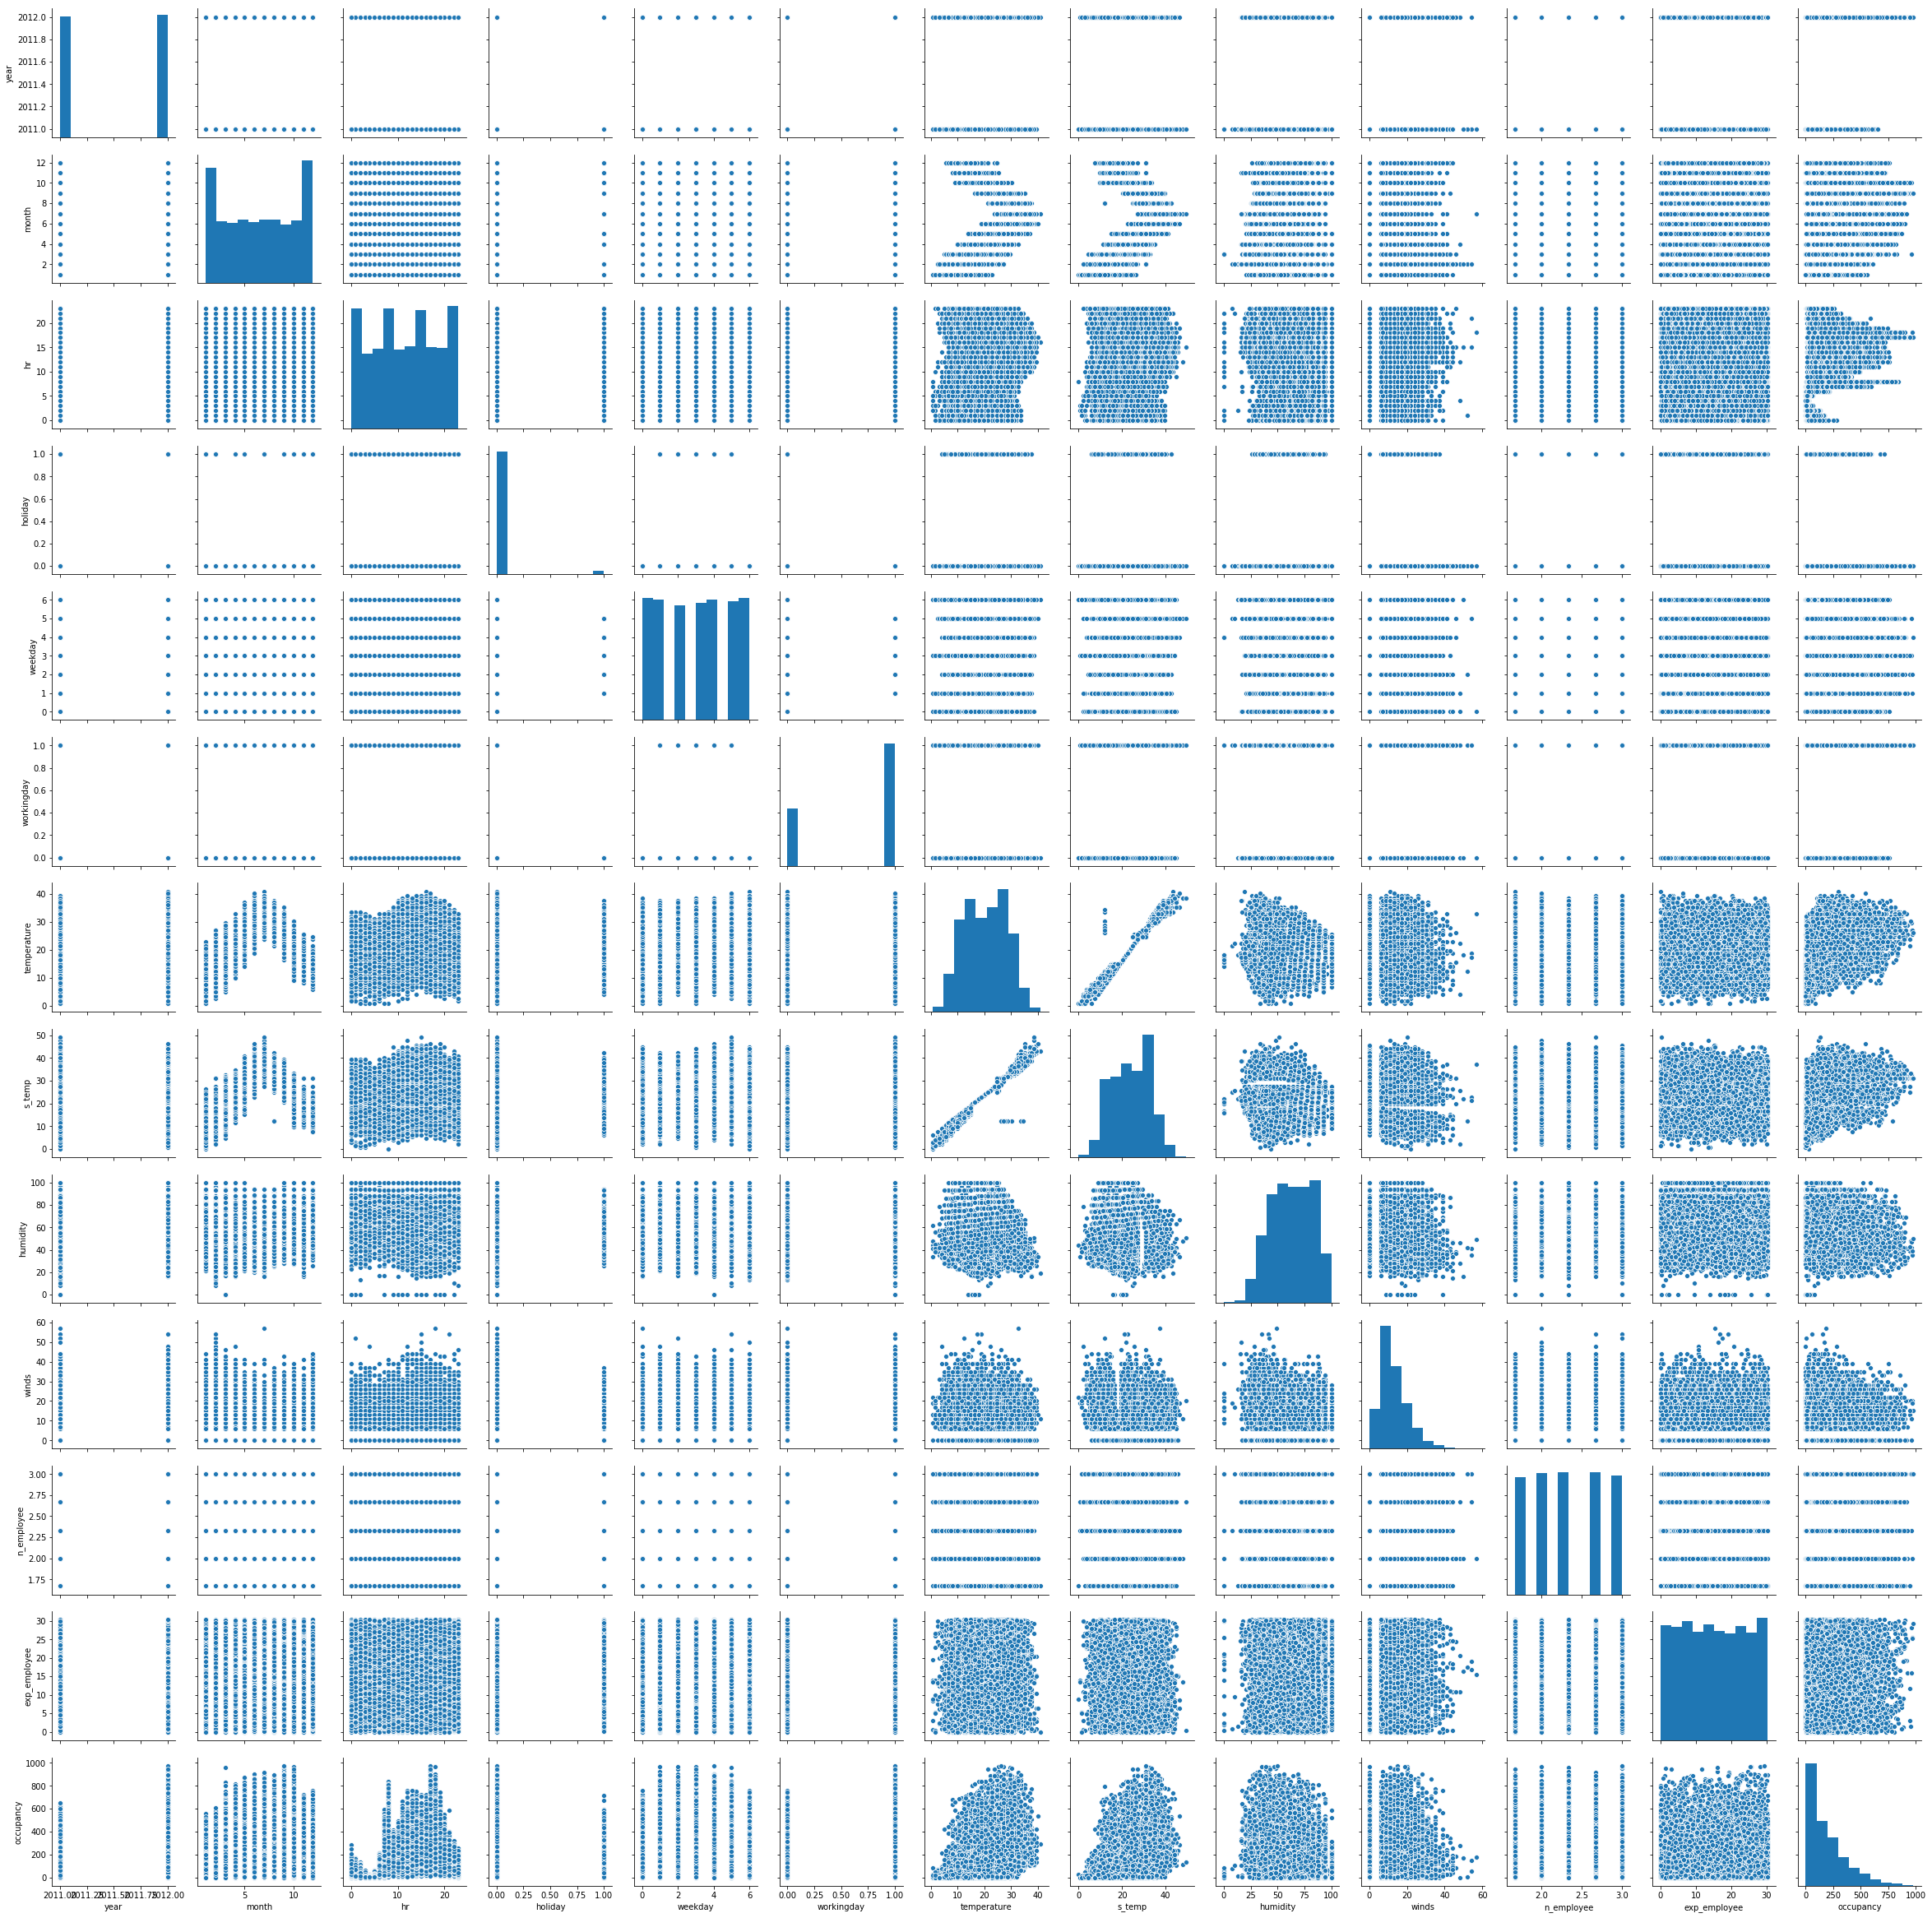

In [14]:
sns.pairplot(data)

## FEATURE SELECTION

### CORRELATION OF NUMERICALS AND TARGET

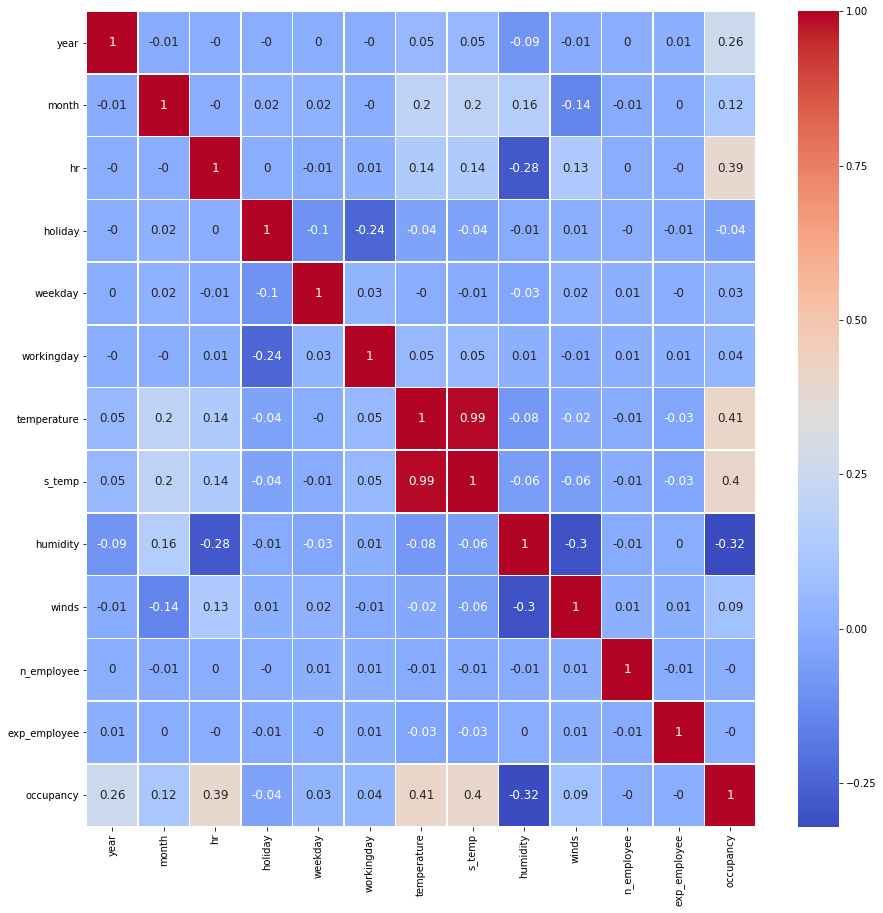

In [15]:
#We can visualise the correlation using a heatmap in Seaborn
%matplotlib inline

plt.figure(figsize = (15,15))
sns.heatmap(data=data.corr().round(2), cmap='coolwarm', linewidths=.5, annot=True, annot_kws={"size":12})
plt.show()

From the figure above we can see that s_temp and temperature are correlated a lot, so i can decide to keep only one of them. 

Thinking about the correlation with the target variable the most important features are the following:

hr, temperature, humidity (negative correlated)

However, I get rid of temperature since it can be very similar to the weather

In [16]:
data = data[['hr', 'humidity', 'season_t', 'weather', 'weekday', 'occupancy']]
data.head()

,hr,humidity,season_t,weather,weekday,occupancy
0,1,94,summer,Clear,4,6
1,18,78,fall,Cloudy,0,377
2,8,90,winter,Cloudy,6,121
3,4,52,winter,Cloudy,1,16
4,0,60,winter,Clear,6,64


## ENCODING CATEGORICAL FEATURES

In [17]:
#One hot encoding for all categorical features
data_onehot = data.copy()
data_onehot = pd.get_dummies(data_onehot, columns=['season_t'], prefix = ['season_t'])
data_onehot = pd.get_dummies(data_onehot, columns=['weekday'], prefix = ['weekday'])
data_onehot = pd.get_dummies(data_onehot, columns=['weather'], prefix = ['weather'])
data_onehot.head()

,hr,humidity,occupancy,season_t_fall,season_t_spring,season_t_summer,season_t_winter,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weather_Clear,weather_Cloudy,weather_LightRain,weather_Snow
0,1,94,6,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1,18,78,377,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,8,90,121,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
3,4,52,16,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0,60,64,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0


In [18]:
data_onehot.columns

Index(['hr', 'humidity', 'occupancy', 'season_t_fall', 'season_t_spring',
       'season_t_summer', 'season_t_winter', 'weekday_0', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'weather_Clear', 'weather_Cloudy', 'weather_LightRain', 'weather_Snow'],
      dtype='object')

In [19]:
#Put stress feature at the end
target = data_onehot['occupancy']
data_onehot = data_onehot.drop(columns=['occupancy'])
data_onehot['occupancy'] = target

data_onehot.head()

,hr,humidity,season_t_fall,season_t_spring,season_t_summer,season_t_winter,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weather_Clear,weather_Cloudy,weather_LightRain,weather_Snow,occupancy
0,1,94,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,6
1,18,78,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,377
2,8,90,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,121
3,4,52,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,16
4,0,60,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,64


In [20]:
data_onehot.columns

Index(['hr', 'humidity', 'season_t_fall', 'season_t_spring', 'season_t_summer',
       'season_t_winter', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'weather_Clear',
       'weather_Cloudy', 'weather_LightRain', 'weather_Snow', 'occupancy'],
      dtype='object')

In [21]:
data_onehot.shape

(10427, 18)

## OUTLIER DETECTION AND REMOVING

In [22]:
data = data_onehot.copy()
data.shape

(10427, 18)

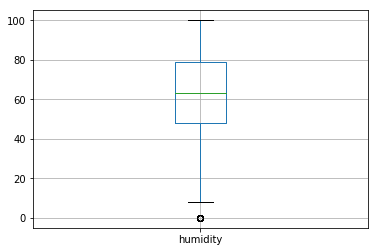

In [23]:
data[['humidity']].boxplot()

In [24]:
#Detecting outliers
z = np.abs(ss.zscore(data[['humidity']]))
print(z)

[[1.61732615]
 [0.79021276]
 [1.4105478 ]
 ...
 [1.01909777]
 [0.11818314]
 [1.0486857 ]]


In [25]:
#Removing outliers
data = data[(z < 3).all(axis=1)]

In [26]:
#Reduced rows
data.shape

(10412, 18)

15 rows have been deleted

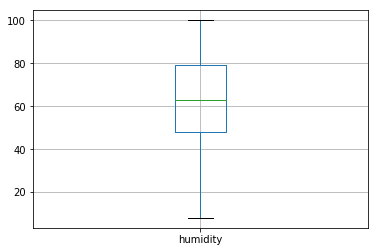

In [27]:
data[['humidity']].boxplot()

## FEATURE SCALING

Before applying any scaling transformations it is very important to split your data into a train set and a test set. If you start scaling before, your training (and test) data might end up scaled around a mean value (see below) that is not actually the mean of the train or test data, and go past the whole reason why you’re scaling in the first place.

In [28]:
data.head()

,hr,humidity,season_t_fall,season_t_spring,season_t_summer,season_t_winter,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weather_Clear,weather_Cloudy,weather_LightRain,weather_Snow,occupancy
0,1,94,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,6
1,18,78,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,377
2,8,90,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,121
3,4,52,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,16
4,0,60,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,64


### SPLITTING X and y

In [29]:
#Splitting into features and target
X, y = data.iloc[:,:-1], data.iloc[:,-1]

## Select Data (logarithm)

From this point I started running all the algorithms but I always got an huge error and a really bad residuals-predicted variable plot. 
What does it mean?
My model isn’t worthless, but it’s definitely not as good as if you had all the variables you needed. I could still use it, and I might say something like “This model is pretty accurate most of the time, but then every once and a while it’s way off.” Is that useful? Probably but not so much.

#### The most common way to improve a model is to transform one or more variables, usually using a “log” transform.

Transforming a variable changes the shape of its distribution. Typically the best place to start is a variable that has an asymmetrical distribution, as opposed to a more symmetrical or bell-shaped distribution.

In general, regression models work better with more symmetrical, bell-shaped curves.

After transforming a variable, note how its distribution changes, the r-squared of the regression changes, and the patterns of the residual plot changes. If those improve (particularly the r-squared closer to 1 and the residuals are lower), it’s probably best to keep the transformation.

A regression model will have unit changes between the x and y variables, where a single unit change in x will coincide with a constant change in y. 

#### Taking the log of one or both variables will effectively change the case from a unit change to a percent change.

In [30]:
#choose your approach:
y = np.log(y)  # transform the target in lofarithmic scale
y.head()

0    1.791759
1    5.932245
2    4.795791
3    2.772589
4    4.158883
Name: occupancy, dtype: float64

### Train and Test set

In [31]:
#splitting train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=123)

### Scaling

In [32]:
#scaling
scaler = StandardScaler(copy=False).fit(X)

scaled_data = scaler.transform(X.astype(float))
scaled_X = pd.DataFrame(scaled_data.astype(float))
scaled_X.columns = X.columns

scaled_data = scaler.transform(X_train.astype(float))
scaled_X_train = pd.DataFrame(scaled_data.astype(float))
scaled_X_train.columns = X_train.columns

scaled_data = scaler.transform(X_test.astype(float))
scaled_X_test = pd.DataFrame(scaled_data.astype(float))
scaled_X_test.columns = X_test.columns

#scaled_X[['temperature', 'humidity']].boxplot()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [33]:
scaled_X.head()

,hr,humidity,season_t_fall,season_t_spring,season_t_summer,season_t_winter,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weather_Clear,weather_Cloudy,weather_LightRain,weather_Snow
0,-1.529697,1.623836,-0.591992,-0.559454,1.702400,-0.570548,-0.414404,-0.410578,-0.39917,-0.40449,2.453753,-0.406898,-0.414563,0.728046,-0.600575,-0.297194,-0.013861
1,0.926845,0.790988,1.689213,-0.559454,-0.587406,-0.570548,2.413103,-0.410578,-0.39917,-0.40449,-0.407539,-0.406898,-0.414563,-1.373539,1.665072,-0.297194,-0.013861
2,-0.518180,1.415624,-0.591992,-0.559454,-0.587406,1.752701,-0.414404,-0.410578,-0.39917,-0.40449,-0.407539,-0.406898,2.412177,-1.373539,1.665072,-0.297194,-0.013861
3,-1.096190,-0.562389,-0.591992,-0.559454,-0.587406,1.752701,-0.414404,2.435588,-0.39917,-0.40449,-0.407539,-0.406898,-0.414563,-1.373539,1.665072,-0.297194,-0.013861
4,-1.674199,-0.145965,-0.591992,-0.559454,-0.587406,1.752701,-0.414404,-0.410578,-0.39917,-0.40449,-0.407539,-0.406898,2.412177,0.728046,-0.600575,-0.297194,-0.013861


In [34]:
scaled_X.describe(include="all") 

,hr,humidity,season_t_fall,season_t_spring,season_t_summer,season_t_winter,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weather_Clear,weather_Cloudy,weather_LightRain,weather_Snow
count,1.041200e+04,1.041200e+04,1.041200e+04,1.041200e+04,1.041200e+04,1.041200e+04,1.041200e+04,1.041200e+04,1.041200e+04,1.041200e+04,1.041200e+04,1.041200e+04,1.041200e+04,1.041200e+04,1.041200e+04,1.041200e+04,1.041200e+04
mean,-8.284021e-17,1.448877e-16,1.916873e-15,1.605302e-16,2.282504e-16,-4.454967e-17,7.433440e-16,3.339946e-16,6.586325e-16,-7.897597e-16,8.669379e-16,1.456544e-15,-4.010857e-16,1.522665e-17,-4.730284e-16,-3.120290e-16,-7.532775e-16
std,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00
min,-1.674199e+00,-2.852720e+00,-5.919915e-01,-5.594539e-01,-5.874060e-01,-5.705481e-01,-4.144042e-01,-4.105784e-01,-3.991696e-01,-4.044898e-01,-4.075390e-01,-4.068979e-01,-4.145633e-01,-1.373539e+00,-6.005747e-01,-2.971943e-01,-1.386084e-02
25%,-8.071847e-01,-7.706010e-01,-5.919915e-01,-5.594539e-01,-5.874060e-01,-5.705481e-01,-4.144042e-01,-4.105784e-01,-3.991696e-01,-4.044898e-01,-4.075390e-01,-4.068979e-01,-4.145633e-01,-1.373539e+00,-6.005747e-01,-2.971943e-01,-1.386084e-02
50%,5.983001e-02,1.019362e-02,-5.919915e-01,-5.594539e-01,-5.874060e-01,-5.705481e-01,-4.144042e-01,-4.105784e-01,-3.991696e-01,-4.044898e-01,-4.075390e-01,-4.068979e-01,-4.145633e-01,7.280463e-01,-6.005747e-01,-2.971943e-01,-1.386084e-02
75%,9.268448e-01,8.430413e-01,1.689213e+00,-5.594539e-01,1.702400e+00,-5.705481e-01,-4.144042e-01,-4.105784e-01,-3.991696e-01,-4.044898e-01,-4.075390e-01,-4.068979e-01,-4.145633e-01,7.280463e-01,1.665072e+00,-2.971943e-01,-1.386084e-02
max,1.649357e+00,1.936154e+00,1.689213e+00,1.787457e+00,1.702400e+00,1.752701e+00,2.413103e+00,2.435588e+00,2.505201e+00,2.472250e+00,2.453753e+00,2.457619e+00,2.412177e+00,7.280463e-01,1.665072e+00,3.364802e+00,7.214569e+01


## Test the features

In [35]:
testing_X_train = sm.add_constant(scaled_X_train)
testing_y_train = list(y_train) # without this line an error comes out
est = sm.OLS(testing_y_train, testing_X_train)
est_fit = est.fit()
est_fit.params

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const                4.543931
hr                   0.755001
humidity            -0.346827
season_t_fall        0.158412
season_t_spring     -0.300150
season_t_summer      0.066701
season_t_winter      0.068116
weekday_0           -0.010599
weekday_1           -0.029142
weekday_2           -0.016592
weekday_3            0.000277
weekday_4           -0.006021
weekday_5            0.032070
weekday_6            0.029715
weather_Clear       -0.015718
weather_Cloudy       0.060942
weather_LightRain   -0.071858
weather_Snow         0.014691
dtype: float64

In [36]:
print(est_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     401.7
Date:                Mon, 02 Dec 2019   Prob (F-statistic):               0.00
Time:                        11:00:10   Log-Likelihood:                -11155.
No. Observations:                7288   AIC:                         2.234e+04
Df Residuals:                    7273   BIC:                         2.244e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.5439      0.01

## Overview

Coming up with a prediction equation like this is only a useful exercise if the independent variables in your dataset have some correlation with your dependent variable. 
So in addition to the prediction components of your equation--the coefficients on your independent variables (betas) and the constant (alpha)--you need some measure to tell you how strongly each independent variable is associated with your dependent variable.

When running your regression, you are trying to discover whether the coefficients on your independent variables are really different from 0 (so the independent variables are having a genuine effect on your dependent variable) or if alternatively any apparent differences from 0 are just due to random chance. 
#### The null (default) hypothesis is always that each independent variable is having absolutely no effect (has a coefficient of 0) and you are looking for a reason to reject this theory.

## P-value, t statistic, standard error

#### The t statistic is the coefficient divided by its standard error. 

The standard error is an estimate of the standard deviation of the coefficient, the amount it varies across cases. It can be thought of as a measure of the precision with which the regression coefficient is measured. If a coefficient is large compared to its standard error, then it is probably different from 0.

How large is large? Your regression software compares the t statistic on your variable with values in the Student's t distribution to determine the P value, which is the number that you really need to be looking at. The Student's t distribution describes how the mean of a sample with a certain number of observations (your n) is expected to behave.

If 95% of the t distribution is closer to the mean than the t-value on the coefficient you are looking at, then you have a P value of 5%. This is also reffered to a significance level of 5%. The P value is the probability of seeing a result as extreme as the one you are getting (a t value as large as yours) in a collection of random data in which the variable had no effect. 
#### A P of 5% or less is the generally accepted point at which to reject the null hypothesis. 
With a P value of 5% (or .05) there is only a 5% chance that results you are seeing would have come up in a random distribution, so you can say with a 95% probability of being correct that the variable is having some effect, assuming your model is specified correctly.

The 95% confidence interval for your coefficients shown by many regression packages gives you the same information. You can be 95% confident that the real, underlying value of the coefficient that you are estimating falls somewhere in that 95% confidence interval, so if the interval does not contain 0, your P value will be .05 or less.

Note that the size of the P value for a coefficient says nothing about the size of the effect that variable is having on your dependent variable - it is possible to have a highly significant result (very small P-value) for a miniscule effect.

## Coefficients

In simple or multiple linear regression, the size of the coefficient for each independent variable gives you the size of the effect that variable is having on your dependent variable, and the sign on the coefficient (positive or negative) gives you the direction of the effect. In regression with a single independent variable, the coefficient tells you how much the dependent variable is expected to increase (if the coefficient is positive) or decrease (if the coefficient is negative) when that independent variable increases by one. In regression with multiple independent variables, the coefficient tells you how much the dependent variable is expected to increase when that independent variable increases by one, holding all the other independent variables constant. Remember to keep in mind the units which your variables are measured in.

## R-Squared and overall significance of the regression

#### The R-squared of the regression is the fraction of the variation in your dependent variable that is accounted for (or predicted by) your independent variables. 
(In regression with a single independent variable, it is the same as the square of the correlation between your dependent and independent variable.) The R-squared is generally of secondary importance, unless your main concern is using the regression equation to make accurate predictions. 

#### The P value tells you how confident you can be that each individual variable has some correlation with the dependent variable, which is the important thing.

Another number to be aware of is the P value for the regression as a whole. 
#### Because your independent variables may be correlated, a condition known as multicollinearity, the coefficients on individual variables may be insignificant when the regression as a whole is significant. Intuitively, this is because highly correlated independent variables are explaining the same part of the variation in the dependent variable, so their explanatory power and the significance of their coefficients is "divided up" between them.


### Multicollinearity is due to the fact there are dummies. But this is not important for our case.

# CASE 1 - REGRESSION WITH NO PARAMETERS

In [37]:
#regressor instantiation
regressor = LinearRegression() #(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)[source]¶
parameters = {}

#DEFINE YOUR GRIDSEARCH 
gs = GridSearchCV(regressor, parameters,cv=3) #with no params it reduces to a CV

gs = gs.fit(scaled_X_train,y_train)

#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#test on hold-out

#gs.score(X_train, y_train)
gs.score(scaled_X_test, y_test)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


***GRIDSEARCH RESULTS***
Best score: -109504138531694536818688.000000 using {}
-109504138531694536818688.000000 (154830369910579630440448.000000) with: {}


0.4186505287606197

Text(0.5, 1.0, 'Occupancy vs Predicted occupancy: $y_i$ vs $\\hat{y}_i$')

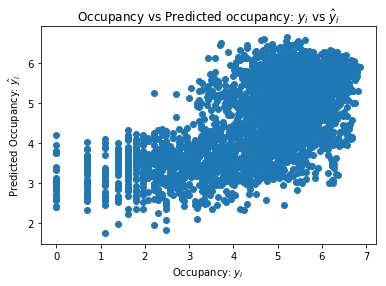

In [38]:
plt.scatter(y_test, gs.predict(scaled_X_test))
plt.xlabel("Occupancy: $y_i$")
plt.ylabel("Predicted Occupancy: $\hat{y}_i$")
plt.title("Occupancy vs Predicted occupancy: $y_i$ vs $\hat{y}_i$")

## Computing MAE

In [39]:
print("MAE train: ", metrics.mean_absolute_error(y_train, gs.predict(scaled_X_train))) 
print("MAE test: ", metrics.mean_absolute_error(y_test, gs.predict(scaled_X_test))) 

MAE train:  0.8849217803834128
MAE test:  0.8853623864702813


In [40]:
error_train=gs.predict(scaled_X_train)-y_train
error_test=gs.predict(scaled_X_test)-y_test

error_train.describe()

count    7288.000000
mean        0.000009
std         1.118201
min        -3.486555
25%        -0.756028
50%        -0.133543
75%         0.692678
max         4.131141
Name: occupancy, dtype: float64

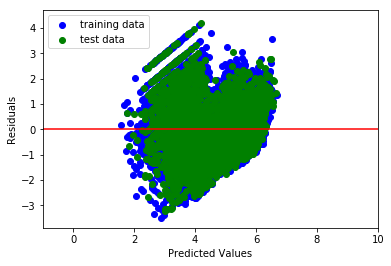

In [41]:
plt.scatter(gs.predict(scaled_X_train),error_train, c="b", label="training data")
plt.scatter(gs.predict(scaled_X_test),error_test, c="g", label="test data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-1, xmax=10, color="r")
plt.xlim([-1,10])
plt.show()

## Normality test

If the residuals are not normally distributed, then the dependent variable or at least one explanatory variable may have the wrong functional form, or important variables may be missing

In [42]:
testing_error_train = pd.DataFrame(error_train)
testing_error_train.columns = ['occupancy_error']
testing_error_train.head()

,occupancy_error
6227,-0.550247
872,-0.218244
7371,0.905644
6531,-2.040951
8056,0.753953


In [43]:

scaler = StandardScaler().fit(testing_error_train)

scaled_error_train = scaler.transform(testing_error_train).flatten()

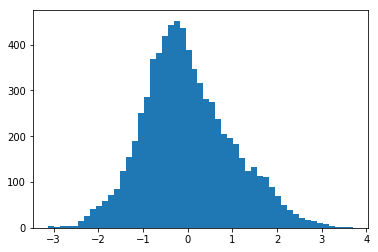

In [44]:
plt.hist(scaled_error_train, bins='auto')  # arguments are passed to np.histogram
plt.show()

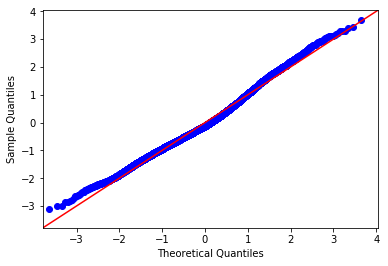

In [45]:
fig = sm.qqplot(scaled_error_train,line='45')
plt.show()

In [46]:
ss.kstest(scaled_error_train, 'norm')

KstestResult(statistic=0.04967600120038573, pvalue=4.783819088308899e-16)

In [47]:
ss.normaltest(scaled_error_train)

NormaltestResult(statistic=157.8498476645231, pvalue=5.288604558613647e-35)

# CASE 2 - REGRESSION WITH PARAMETERS

## 2.1 - Ridge Regression

In [48]:
#DEFINE YOUR REGRESSOR and THE PARAMETERS GRID
from sklearn.linear_model import Ridge


regressor = Ridge()

parameters = {"alpha": [0.001,0.01,0.1,1,10], "normalize": [True, False]}
#note that we set alpha using the argument alpha
#also notice the argument normalize: setting this equal to True ensures that all 
#our variables are on the same scale


gs = GridSearchCV(regressor, parameters, cv=3) #with no params it reduces to a CV

gs = gs.fit(scaled_X_train,y_train)

#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#test on hold-out
gs.score(scaled_X_test, y_test)

***GRIDSEARCH RESULTS***
Best score: 0.433245 using {'alpha': 10, 'normalize': False}
-7964.198439 (11261.376554) with: {'alpha': 0.001, 'normalize': True}
0.433239 (0.005969) with: {'alpha': 0.001, 'normalize': False}
-7802.524900 (11032.782721) with: {'alpha': 0.01, 'normalize': True}
0.433239 (0.005969) with: {'alpha': 0.01, 'normalize': False}
-6421.296921 (9079.830077) with: {'alpha': 0.1, 'normalize': True}
0.433239 (0.005969) with: {'alpha': 0.1, 'normalize': False}
-1709.477314 (2417.557467) with: {'alpha': 1, 'normalize': True}
0.433240 (0.005967) with: {'alpha': 1, 'normalize': False}
-50.151730 (71.038290) with: {'alpha': 10, 'normalize': True}
0.433245 (0.005946) with: {'alpha': 10, 'normalize': False}


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.41866905900090234

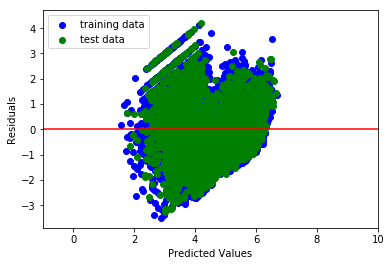

In [49]:
error_train=gs.predict(scaled_X_train)-y_train.to_numpy().flatten()
error_test=gs.predict(scaled_X_test)-y_test.to_numpy().flatten()


plt.scatter(gs.predict(scaled_X_train),error_train, c="b", label="training data")
plt.scatter(gs.predict(scaled_X_test),error_test, c="g", label="test data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-1, xmax=10, color="r")
plt.xlim([-1,10])
plt.show()

## Computing MAE

In [50]:
print("MAE train: ", metrics.mean_absolute_error(y_train, gs.predict(scaled_X_train))) 
print("MAE test: ", metrics.mean_absolute_error(y_test, gs.predict(scaled_X_test))) 

MAE train:  0.8848627538488305
MAE test:  0.8853731961696985


## Normality test

In [51]:
testing_error_train = pd.DataFrame(error_train)
testing_error_train.columns = ['occupancy_error']
testing_error_train.head()

,occupancy_error
0,-0.543995
1,-0.220778
2,0.909710
3,-2.034512
4,0.749366


In [52]:

scaler = StandardScaler().fit(testing_error_train)

scaled_error_train = scaler.transform(testing_error_train).flatten()

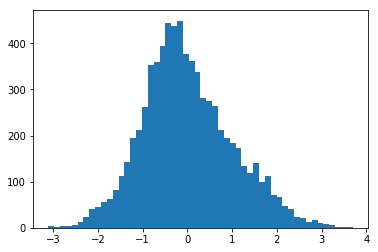

In [53]:
plt.hist(scaled_error_train, bins='auto')  # arguments are passed to np.histogram
plt.show()

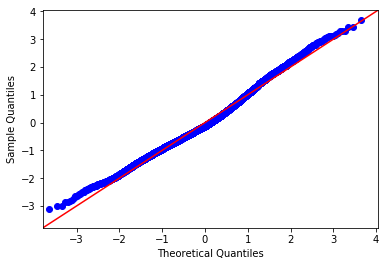

In [54]:
fig = sm.qqplot(scaled_error_train,line='45')
plt.show()

In [55]:
ss.kstest(scaled_error_train, 'norm')

KstestResult(statistic=0.050215397081096125, pvalue=2.1811878557964593e-16)

In [56]:
ss.normaltest(scaled_error_train)

NormaltestResult(statistic=159.24847567303004, pvalue=2.6280455111893356e-35)

## 2.2 - Lasso Regression

In [57]:
#DEFINE YOUR REGRESSOR and THE PARAMETERS GRID
from sklearn.linear_model import Lasso


regressor = Lasso()
parameters = {"alpha": [0.001,0.01,0.1,1,10], "normalize": [True]}


gs = GridSearchCV(regressor, parameters, cv=3) #with no params it reduces to a CV

gs = gs.fit(scaled_X_train,y_train)

lasso_coef = gs.best_estimator_.coef_
print(lasso_coef)

#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#test on hold-out
gs.score(scaled_X_test, y_test)

[ 0.68630419 -0.26777501  0.02554593 -0.28925954  0.         -0.
 -0.         -0.         -0.         -0.         -0.          0.
  0.         -0.          0.         -0.01797981  0.        ]
***GRIDSEARCH RESULTS***
Best score: 0.422684 using {'alpha': 0.001, 'normalize': True}
0.422684 (0.003071) with: {'alpha': 0.001, 'normalize': True}
0.100926 (0.007029) with: {'alpha': 0.01, 'normalize': True}
-0.000534 (0.000397) with: {'alpha': 0.1, 'normalize': True}
-0.000534 (0.000397) with: {'alpha': 1, 'normalize': True}
-0.000534 (0.000397) with: {'alpha': 10, 'normalize': True}


0.4048927060201977

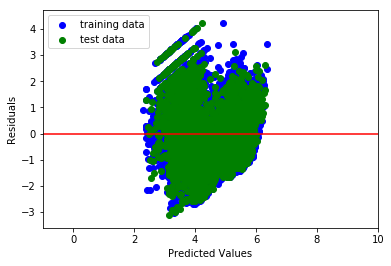

In [58]:
error_train=gs.predict(scaled_X_train)-y_train.to_numpy().flatten()
error_test=gs.predict(scaled_X_test)-y_test.to_numpy().flatten()

plt.scatter(gs.predict(scaled_X_train),error_train, c="b", label="training data")
plt.scatter(gs.predict(scaled_X_test),error_test, c="g", label="test data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-1, xmax=10, color="r")
plt.xlim([-1,10])
plt.show()

## Computing MAE

In [59]:
print("MAE train: ", metrics.mean_absolute_error(y_train, gs.predict(scaled_X_train))) 
print("MAE test: ", metrics.mean_absolute_error(y_test, gs.predict(scaled_X_test))) 

MAE train:  0.9008591520926666
MAE test:  0.9006177076171007


## Normality test

In [60]:
testing_error_train = pd.DataFrame(error_train)
testing_error_train.columns = ['occupancy_error']
testing_error_train.head()

,occupancy_error
0,-0.385720
1,-0.175682
2,1.165864
3,-1.753551
4,0.816638


In [61]:

scaler = StandardScaler().fit(testing_error_train)

scaled_error_train = scaler.transform(testing_error_train).flatten()

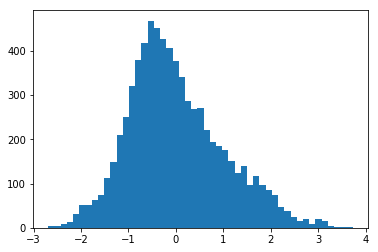

In [62]:
plt.hist(scaled_error_train, bins='auto')  # arguments are passed to np.histogram
plt.show()

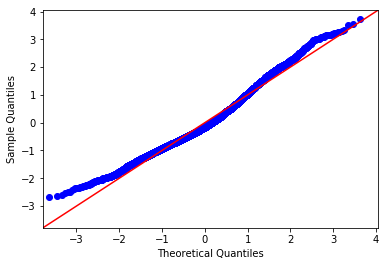

In [63]:
fig = sm.qqplot(scaled_error_train,line='45')
plt.show()


In [64]:
ss.kstest(scaled_error_train, 'norm')

KstestResult(statistic=0.06356792699476177, pvalue=5.261799883625757e-26)

In [65]:
ss.normaltest(scaled_error_train)

NormaltestResult(statistic=315.5614091854428, pvalue=2.997164946031964e-69)

# 3 - Random Forest Regressor

In [66]:
#DEFINE YOUR REGRESSOR and THE PARAMETERS GRID
from sklearn.ensemble import RandomForestRegressor 

In [67]:

regressor = RandomForestRegressor()

'''
parameters = {"n_estimators":[5,10,100,1000,2000], "criterion": ['mse'], 
              "min_samples_leaf": [0.1,1], "random_state" : [42]}
'''
parameters = {"n_estimators":[1000], "criterion": ['mse'], 
              "min_samples_leaf": [1], "random_state" : [42]}

gs_RF = GridSearchCV(regressor, parameters, cv=3) #with no params it reduces to a CV
#'criterion': 'mse', 'min_samples_leaf': 1, 'n_estimators': 1000, 'random_state': 42
gs_RF = gs_RF.fit(scaled_X_train,y_train)

#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs_RF.best_score_, gs_RF.best_params_))
means = gs_RF.cv_results_['mean_test_score']
stds = gs_RF.cv_results_['std_test_score']
params = gs_RF.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#Returns the coefficient of determination R^2 of the prediction.
#Explained variance score: 1 is perfect prediction
gs_RF.score(scaled_X_test, y_test)

***GRIDSEARCH RESULTS***
Best score: 0.870235 using {'criterion': 'mse', 'min_samples_leaf': 1, 'n_estimators': 1000, 'random_state': 42}
0.870235 (0.004852) with: {'criterion': 'mse', 'min_samples_leaf': 1, 'n_estimators': 1000, 'random_state': 42}


0.868403660270372

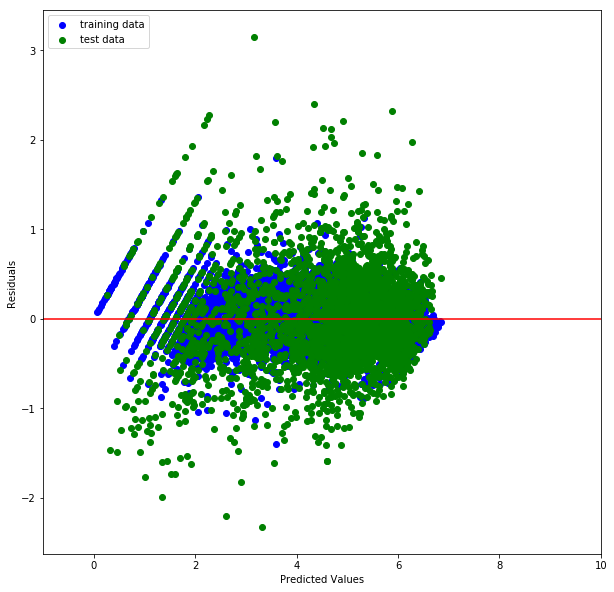

In [68]:
error_train=gs_RF.predict(scaled_X_train)-y_train.to_numpy().flatten()
error_test=gs_RF.predict(scaled_X_test)-y_test.to_numpy().flatten()
plt.figure(figsize = (10,10))
plt.scatter(gs_RF.predict(scaled_X_train),error_train, c="b", label="training data")
plt.scatter(gs_RF.predict(scaled_X_test),error_test, c="g", label="test data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-1, xmax=10, color="r")
plt.xlim([-1,10])
plt.show()

Text(0.5, 1.0, 'Occupancy vs Predicted occupancy: $y_i$ vs $\\hat{y}_i$')

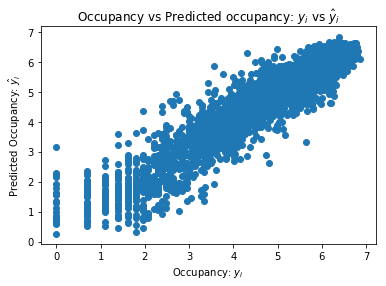

In [69]:
plt.scatter(y_test, gs_RF.predict(scaled_X_test))
plt.xlabel("Occupancy: $y_i$")
plt.ylabel("Predicted Occupancy: $\hat{y}_i$")
plt.title("Occupancy vs Predicted occupancy: $y_i$ vs $\hat{y}_i$")

## Computing MAE

In [70]:
print("MAE train: ", metrics.mean_absolute_error(y_train, gs_RF.predict(scaled_X_train))) 
print("MAE test: ", metrics.mean_absolute_error(y_test, gs_RF.predict(scaled_X_test))) 

MAE train:  0.16033738444768297
MAE test:  0.3985228483911417


## Computing MSE

In [71]:
print("MSE train: ",metrics.mean_squared_error(y_train, gs_RF.predict(scaled_X_train)))
print("MSE test: ",metrics.mean_squared_error(y_test, gs_RF.predict(scaled_X_test)))

MSE train:  0.0472575618967276
MSE test:  0.2822637688780782


## Computing R-squared

In [72]:
print("r2_train: ",np.sqrt(metrics.r2_score(y_train, gs_RF.predict(scaled_X_train))))
print("r2_test: ",np.sqrt(metrics.r2_score(y_test, gs_RF.predict(scaled_X_test))))

r2_train:  0.9892840837762461
r2_test:  0.9318817844932757


## Normality Test

In [73]:
testing_error_train = pd.DataFrame(error_train)
testing_error_train.columns = ['occupancy_error']


scaler = StandardScaler().fit(testing_error_train)

scaled_error_train = scaler.transform(testing_error_train).flatten()

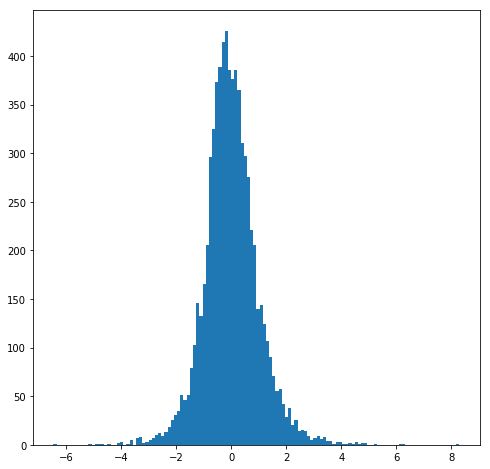

In [74]:
plt.figure(figsize=(8,8))
plt.hist(scaled_error_train, bins='auto')  # arguments are passed to np.histogram
plt.show()

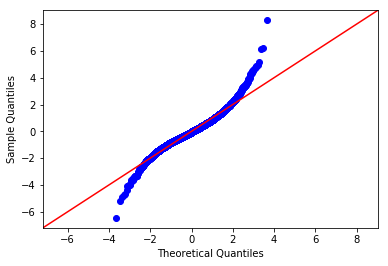

In [75]:

fig = sm.qqplot(scaled_error_train,line='45')
plt.show()


QQ plot provides a way to evaluate visually whether they follow a normal distribution. For an (approximately) normal distribution the points must fall (approximately) on a straight line. An S-shaped curve indicates that the tails of the distribution of the residuals are shorter compared to the tails of a normal density. On the other hand, for an upside-down ‘S’ the tails are longer.

In [76]:
# Kolmogorov-Smirnov Test
#    Test the distribution G(x) against a given distribution F(x).
#    Under the null hypothesis the two distributions are identical, G(x)=F(x).
'''
So if p < 0.05, we don't believe that our variable follows a normal distribution in our population.
'''
ss.kstest(scaled_error_train, 'norm')

KstestResult(statistic=0.04620279943132044, pvalue=6.134757753722786e-14)

In [77]:
# D’Agostino Test
#    Under the null hypothesis that the distributions follows a normal distribution.
'''
The tests assume that that the sample was drawn from a Gaussian distribution. Technically this is called the null hypothesis, or H0. A threshold level is chosen called alpha, typically 5% (or 0.05), that is used to interpret the p-value.

In the SciPy implementation of these tests, you can interpret the p value as follows.

p <= alpha: reject H0, not normal.
p > alpha: fail to reject H0, normal.

It is very likely true to be normal given the evidence.
'''
ss.normaltest(scaled_error_train)

NormaltestResult(statistic=694.7431500480282, pvalue=1.3754404651152102e-151)

# Support Vector Regression

In [78]:
from sklearn.svm import SVR


regressor = SVR()
'''
parameters = {'C': [0.1,1,10,100,1000],
             'epsilon': [0.01,0.1,1,10],
             'gamma':['auto','scale'],
             'kernel': ['rbf','poly'],
             'degree': [2,3,4,5,6]
             }


'''
parameters = {'C': [2000],
             'epsilon': [1],
             'gamma':['scale'],
             'kernel': ['rbf','poly'],
             'degree': [2,3]
             }



#DEFINE YOUR GRIDSEARCH 
gs_SVR = GridSearchCV(regressor, parameters, cv=3, verbose = 10) #with no params it reduces to a CV

gs_SVR = gs_SVR.fit(scaled_X_train,y_train)

#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs_SVR.best_score_, gs_SVR.best_params_))
means = gs_SVR.cv_results_['mean_test_score']
stds = gs_SVR.cv_results_['std_test_score']
params = gs_SVR.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#Returns the coefficient of determination R^2 of the prediction.
#Explained variance score: 1 is perfect prediction
gs_SVR.score(scaled_X_test, y_test)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] C=2000, degree=2, epsilon=1, gamma=scale, kernel=rbf ............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=2000, degree=2, epsilon=1, gamma=scale, kernel=rbf, score=0.5555554094862292, total=  12.2s
[CV] C=2000, degree=2, epsilon=1, gamma=scale, kernel=rbf ............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.3s remaining:    0.0s


[CV]  C=2000, degree=2, epsilon=1, gamma=scale, kernel=rbf, score=0.6362273500430806, total=  11.2s
[CV] C=2000, degree=2, epsilon=1, gamma=scale, kernel=rbf ............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   23.6s remaining:    0.0s


[CV]  C=2000, degree=2, epsilon=1, gamma=scale, kernel=rbf, score=0.615111012502052, total=  12.1s
[CV] C=2000, degree=2, epsilon=1, gamma=scale, kernel=poly ...........


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   36.0s remaining:    0.0s


[CV]  C=2000, degree=2, epsilon=1, gamma=scale, kernel=poly, score=-631.296428806555, total=  40.5s
[CV] C=2000, degree=2, epsilon=1, gamma=scale, kernel=poly ...........


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.3min remaining:    0.0s


[CV]  C=2000, degree=2, epsilon=1, gamma=scale, kernel=poly, score=0.5694970936059838, total=  31.0s
[CV] C=2000, degree=2, epsilon=1, gamma=scale, kernel=poly ...........


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.8min remaining:    0.0s


[CV]  C=2000, degree=2, epsilon=1, gamma=scale, kernel=poly, score=0.5518169917106968, total=  34.2s
[CV] C=2000, degree=3, epsilon=1, gamma=scale, kernel=rbf ............


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  2.4min remaining:    0.0s


[CV]  C=2000, degree=3, epsilon=1, gamma=scale, kernel=rbf, score=0.5555554094862292, total=  14.0s
[CV] C=2000, degree=3, epsilon=1, gamma=scale, kernel=rbf ............


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  2.6min remaining:    0.0s


[CV]  C=2000, degree=3, epsilon=1, gamma=scale, kernel=rbf, score=0.6362273500430806, total=  11.9s
[CV] C=2000, degree=3, epsilon=1, gamma=scale, kernel=rbf ............


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  2.8min remaining:    0.0s


[CV]  C=2000, degree=3, epsilon=1, gamma=scale, kernel=rbf, score=0.615111012502052, total=  13.6s
[CV] C=2000, degree=3, epsilon=1, gamma=scale, kernel=poly ...........


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  3.0min remaining:    0.0s


[CV]  C=2000, degree=3, epsilon=1, gamma=scale, kernel=poly, score=-79.50847067744397, total= 1.8min
[CV] C=2000, degree=3, epsilon=1, gamma=scale, kernel=poly ...........
[CV]  C=2000, degree=3, epsilon=1, gamma=scale, kernel=poly, score=0.5333991973073824, total= 3.6min
[CV] C=2000, degree=3, epsilon=1, gamma=scale, kernel=poly ...........
[CV]  C=2000, degree=3, epsilon=1, gamma=scale, kernel=poly, score=0.521863380921214, total= 2.9min


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 11.3min finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


***GRIDSEARCH RESULTS***
Best score: 0.602292 using {'C': 2000, 'degree': 2, 'epsilon': 1, 'gamma': 'scale', 'kernel': 'rbf'}
0.602292 (0.034160) with: {'C': 2000, 'degree': 2, 'epsilon': 1, 'gamma': 'scale', 'kernel': 'rbf'}
-210.116170 (297.880716) with: {'C': 2000, 'degree': 2, 'epsilon': 1, 'gamma': 'scale', 'kernel': 'poly'}
0.602292 (0.034160) with: {'C': 2000, 'degree': 3, 'epsilon': 1, 'gamma': 'scale', 'kernel': 'rbf'}
-26.158391 (37.731968) with: {'C': 2000, 'degree': 3, 'epsilon': 1, 'gamma': 'scale', 'kernel': 'poly'}


0.6061191174074654

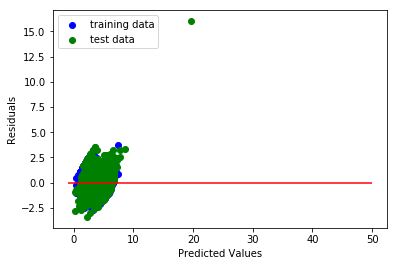

In [79]:
error_train=gs_SVR.predict(scaled_X_train)-y_train.to_numpy().flatten()
error_test=gs_SVR.predict(scaled_X_test)-y_test.to_numpy().flatten()

plt.scatter(gs_SVR.predict(scaled_X_train),error_train, c="b", label="training data")
plt.scatter(gs_SVR.predict(scaled_X_test),error_test, c="g", label="test data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-1, xmax=50, color="r")
plt.show()

## Computing MAE

In [80]:
print("MAE train: ", metrics.mean_absolute_error(y_train, gs_SVR.predict(scaled_X_train))) 
print("MAE test: ", metrics.mean_absolute_error(y_test, gs_SVR.predict(scaled_X_test))) 

MAE train:  0.6363718069498244
MAE test:  0.6997176688759953


## Normality test

In [81]:
testing_error_train = pd.DataFrame(error_train)
testing_error_train.columns = ['occupancy_error']
testing_error_train.head()

,occupancy_error
0,0.222843
1,-0.798665
2,0.999278
3,-1.037479
4,0.461512


In [82]:

scaler = StandardScaler().fit(testing_error_train)

scaled_error_train = scaler.transform(testing_error_train).flatten()

In [83]:
ss.kstest(scaled_error_train, 'norm')

KstestResult(statistic=0.03702440780748522, pvalue=4.201886062721441e-09)

In [84]:
ss.normaltest(scaled_error_train)

NormaltestResult(statistic=49.02154043823491, pvalue=2.2652062260456135e-11)

# MLP Regressor

In [85]:
from sklearn.neural_network import MLPRegressor


regressor = MLPRegressor(random_state=0)
parameters = {'hidden_layer_sizes': [(50, 100, 50)],
              'solver' : ['sgd'],
              'batch_size': [128], #how many records have to pass before backpropagate because of bad residuals
              'learning_rate' : ['constant'],
              'alpha':10.0 ** -np.arange(1, 3),
              'max_iter':[200]} #criteria to stop

#DEFINE YOUR GRIDSEARCH 
from sklearn.model_selection import GridSearchCV
gs_MLP = GridSearchCV(regressor, parameters, cv=3, verbose = 10) #with no params it reduces to a CV

gs_MLP = gs_MLP.fit(scaled_X_train,y_train)

#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs_MLP.best_score_, gs_MLP.best_params_))
means = gs_MLP.cv_results_['mean_test_score']
stds = gs_MLP.cv_results_['std_test_score']
params = gs_MLP.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#Returns the coefficient of determination R^2 of the prediction.
#Explained variance score: 1 is perfect prediction
gs_MLP.score(scaled_X_test, y_test)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] alpha=0.1, batch_size=128, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=200, solver=sgd 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.1s remaining:    0.0s


[CV]  alpha=0.1, batch_size=128, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=200, solver=sgd, score=0.40312806975979965, total=   9.1s
[CV] alpha=0.1, batch_size=128, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=200, solver=sgd 


/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   16.8s remaining:    0.0s


[CV]  alpha=0.1, batch_size=128, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=200, solver=sgd, score=0.857475585140371, total=   7.7s
[CV] alpha=0.1, batch_size=128, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=200, solver=sgd 


/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   24.5s remaining:    0.0s


[CV]  alpha=0.1, batch_size=128, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=200, solver=sgd, score=0.8500696284565188, total=   7.7s
[CV] alpha=0.01, batch_size=128, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=200, solver=sgd 


/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   31.4s remaining:    0.0s


[CV]  alpha=0.01, batch_size=128, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=200, solver=sgd, score=0.3490528899732358, total=   6.9s
[CV] alpha=0.01, batch_size=128, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=200, solver=sgd 


/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   39.6s remaining:    0.0s


[CV]  alpha=0.01, batch_size=128, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=200, solver=sgd, score=0.8576583510661789, total=   8.2s
[CV] alpha=0.01, batch_size=128, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=200, solver=sgd 


/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   49.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   49.7s finished


[CV]  alpha=0.01, batch_size=128, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, max_iter=200, solver=sgd, score=0.8478170820153242, total=  10.0s
***GRIDSEARCH RESULTS***
Best score: 0.703517 using {'alpha': 0.1, 'batch_size': 128, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'sgd'}
0.703517 (0.212472) with: {'alpha': 0.1, 'batch_size': 128, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'sgd'}
0.684797 (0.237490) with: {'alpha': 0.01, 'batch_size': 128, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'sgd'}


/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.8544194389770301

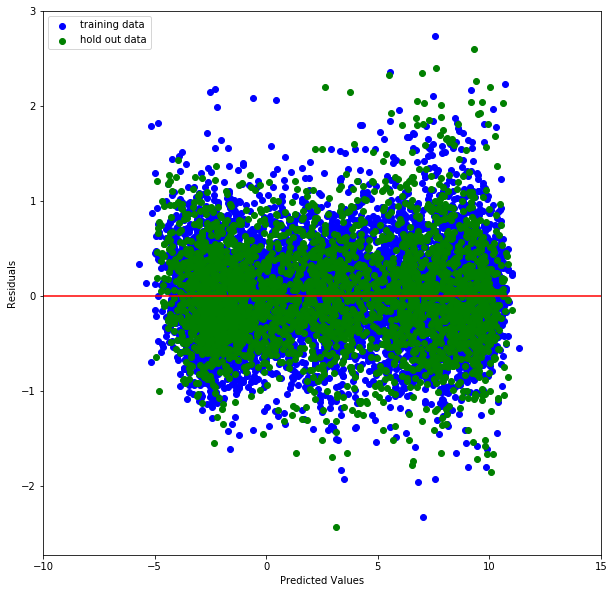

In [86]:
error_train=gs_MLP.predict(scaled_X_train)-y_train.to_numpy().flatten()
error_test=gs_MLP.predict(scaled_X_test)-y_test.to_numpy().flatten()

plt.figure(figsize = (10,10))
plt.scatter(gs_MLP.predict(X_train),error_train, c="b", label="training data")
plt.scatter(gs_MLP.predict(X_test),error_test, c="g", label="hold out data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=15, color="r")
plt.xlim([-10,15])
plt.show()

## Computing MAE

In [87]:
print("MAE train: ", metrics.mean_absolute_error(y_train, gs_MLP.predict(scaled_X_train))) 
print("MAE test: ", metrics.mean_absolute_error(y_test, gs_MLP.predict(scaled_X_test))) 

MAE train:  0.38297780514554564
MAE test:  0.42675606236379676


## Computing MSE

In [88]:
print("MSE train: ",metrics.mean_squared_error(y_train, gs_MLP.predict(scaled_X_train)))
print("MSE test: ",metrics.mean_squared_error(y_test, gs_MLP.predict(scaled_X_test)))

MSE train:  0.24869912751684312
MSE test:  0.3122588205276423


## Computing R-squared

In [89]:
print("r2_train: ",np.sqrt(metrics.r2_score(y_train, gs_MLP.predict(scaled_X_train))))
print("r2_test: ",np.sqrt(metrics.r2_score(y_test, gs_MLP.predict(scaled_X_test))))

r2_train:  0.9422401386164365
r2_test:  0.9243481156885809


Text(0.5, 1.0, 'Occupancy vs Predicted occupancy: $y_i$ vs $\\hat{y}_i$')

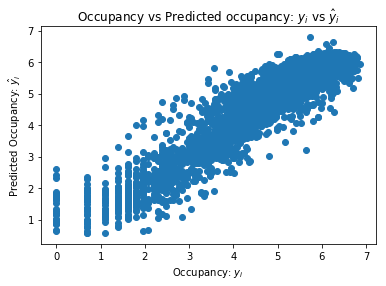

In [90]:
plt.scatter(y_test, gs_MLP.predict(scaled_X_test))
plt.xlabel("Occupancy: $y_i$")
plt.ylabel("Predicted Occupancy: $\hat{y}_i$")
plt.title("Occupancy vs Predicted occupancy: $y_i$ vs $\hat{y}_i$")

## Normality test

In [91]:
testing_error_train = pd.DataFrame(error_train)
testing_error_train.columns = ['occupancy_error']
testing_error_train.head()

,occupancy_error
0,-0.194680
1,-0.269221
2,0.132844
3,-0.655053
4,0.430877


In [92]:

scaler = StandardScaler().fit(testing_error_train)

scaled_error_train = scaler.transform(testing_error_train).flatten()

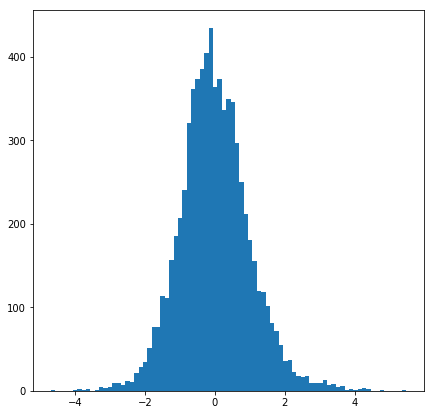

In [93]:
plt.figure(figsize = (7,7))
plt.hist(scaled_error_train, bins='auto')  # arguments are passed to np.histogram
plt.show()

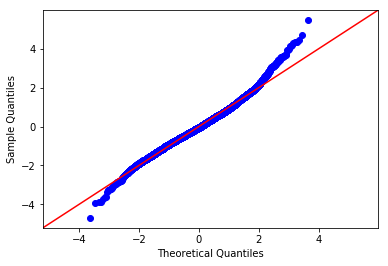

In [94]:
fig = sm.qqplot(scaled_error_train,line='45')
plt.show()

In [95]:
ss.kstest(scaled_error_train, 'norm')

KstestResult(statistic=0.028058326645720943, pvalue=2.0768027745150847e-05)

In [96]:
ss.normaltest(scaled_error_train)

NormaltestResult(statistic=297.03184279630716, pvalue=3.1648626130641378e-65)